In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('student-por.csv')

In [25]:
sample_sizes = [5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 60 , 70 , 80]

In [26]:
noofsamples = 1000

In [27]:
variances = []
population_variance = []
for size in sample_sizes:
    sample_means = []
    for i in range(noofsamples) :
        sample = data['age'].sample(size) 
        sample_means.append(np.mean(sample)) 
    variances.append(np.var(sample_means))
    population_variance.append(np.var(data['age'])/size)

In [28]:
for mean_var , pop_var in zip(variances , population_variance):
    print(mean_var-pop_var)

-0.006875586147706114
-0.0018040530738531457
-0.00044275093812426447
-0.004446849036926548
-0.005761747629541257
-0.003835048802395498
-0.0030929114904886673
-0.000743123893463267
-0.0026986700657945437
-0.0015871486147706164
-0.0028484957900866414
-0.001608556969734172
-0.0023155555404816425


In [19]:
## Expected Value of Sample Standard Deviation == Population Variance if ddof = 1 else this is not same

In [29]:
variances = []
population_variance = []
for size in sample_sizes:
    sample_variances = []
    for i in range(noofsamples) :
        sample = data['age'].sample(size) 
        sample_variances.append(np.var(sample , ddof=1)) 
    variances.append(np.mean(sample_variances))

In [30]:
for i in variances:
    print(i , data['age'].var())

1.5050999999999999 1.483859308718066
1.497088888888889 1.483859308718066
1.5166857142857144 1.483859308718066
1.5109078947368422 1.483859308718066
1.4577766666666667 1.483859308718066
1.4823160919540228 1.483859308718066
1.474090756302521 1.483859308718066
1.5030705128205126 1.483859308718066
1.4766878787878788 1.483859308718066
1.488361632653061 1.483859308718066
1.488617231638418 1.483859308718066
1.492421946169772 1.483859308718066
1.4867667721518987 1.483859308718066


In [31]:
## Now Check for ddof = 0

In [32]:
variances = []
population_variance = []
for size in sample_sizes:
    sample_variances = []
    for i in range(noofsamples) :
        sample = data['age'].sample(size) 
        sample_variances.append(np.var(sample , ddof=0)) 
    variances.append(np.mean(sample_variances))

In [33]:
for i , j in zip(variances , sample_sizes):
    print(i-data['age'].var())

-0.3088193087180662
-0.15903930871806615
-0.12775264205139947
-0.05635180871806589
-0.058214508718066105
-0.03746819760695508
-0.039831553616025195
-0.030581808718065817
-0.025974864273621723
-0.037391308718066174
-0.02047430871806588
-0.004168084228270308
-0.02008274621806616


from above we know that there is a difference between Expected Value of Sample Variances and Population Variances as ddof = 0 and equals to (n-1)/n

In [34]:
for i , j in zip(variances , sample_sizes):
    print(i - ((j-1)/j)*data['age'].var())

-0.012047446974452924
-0.010653377846259637
-0.02882868813686179
0.01784115671783737
0.0011398636306565457
0.01199377935031376
0.0025644266330624443
0.006514673999885812
0.0069997870312241695
-0.007714122543704738
0.004256679760568538
0.01702990589627351
-0.0015345048590904575


From above We came to conclusion that the 


        Expected value of Sample Variance = Population Variance if ddof = 1
        Expected value of Sample Variance = ((sample_size - 1)/sample_size)*population_variance if ddof = 0

In [35]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [46]:
from scipy.stats import chi2 , norm

In [18]:
lb = chi2.ppf(0.00001 , df = 5)
ub = chi2.ppf(0.99999 , df = 5)

In [19]:
x = np.linspace(lb , ub , 1000)

In [20]:
y = chi2.pdf(x , df = 5)

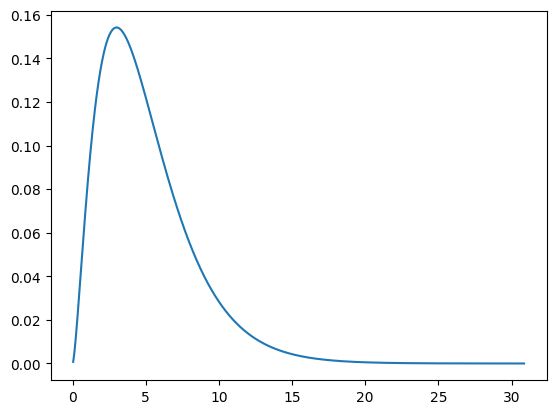

In [22]:
plt.plot(x , y )


                                            ******  Sampling Distribution of Sample Variance  ******

As We know that the Sample Variances will follow the Chi Squared Distribpution with (n-1) dof 

                   (n-1)*(S^2)/(sigma^2) 

In [37]:
sample_sizes = [5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60]

In [38]:
len(sample_sizes)

12

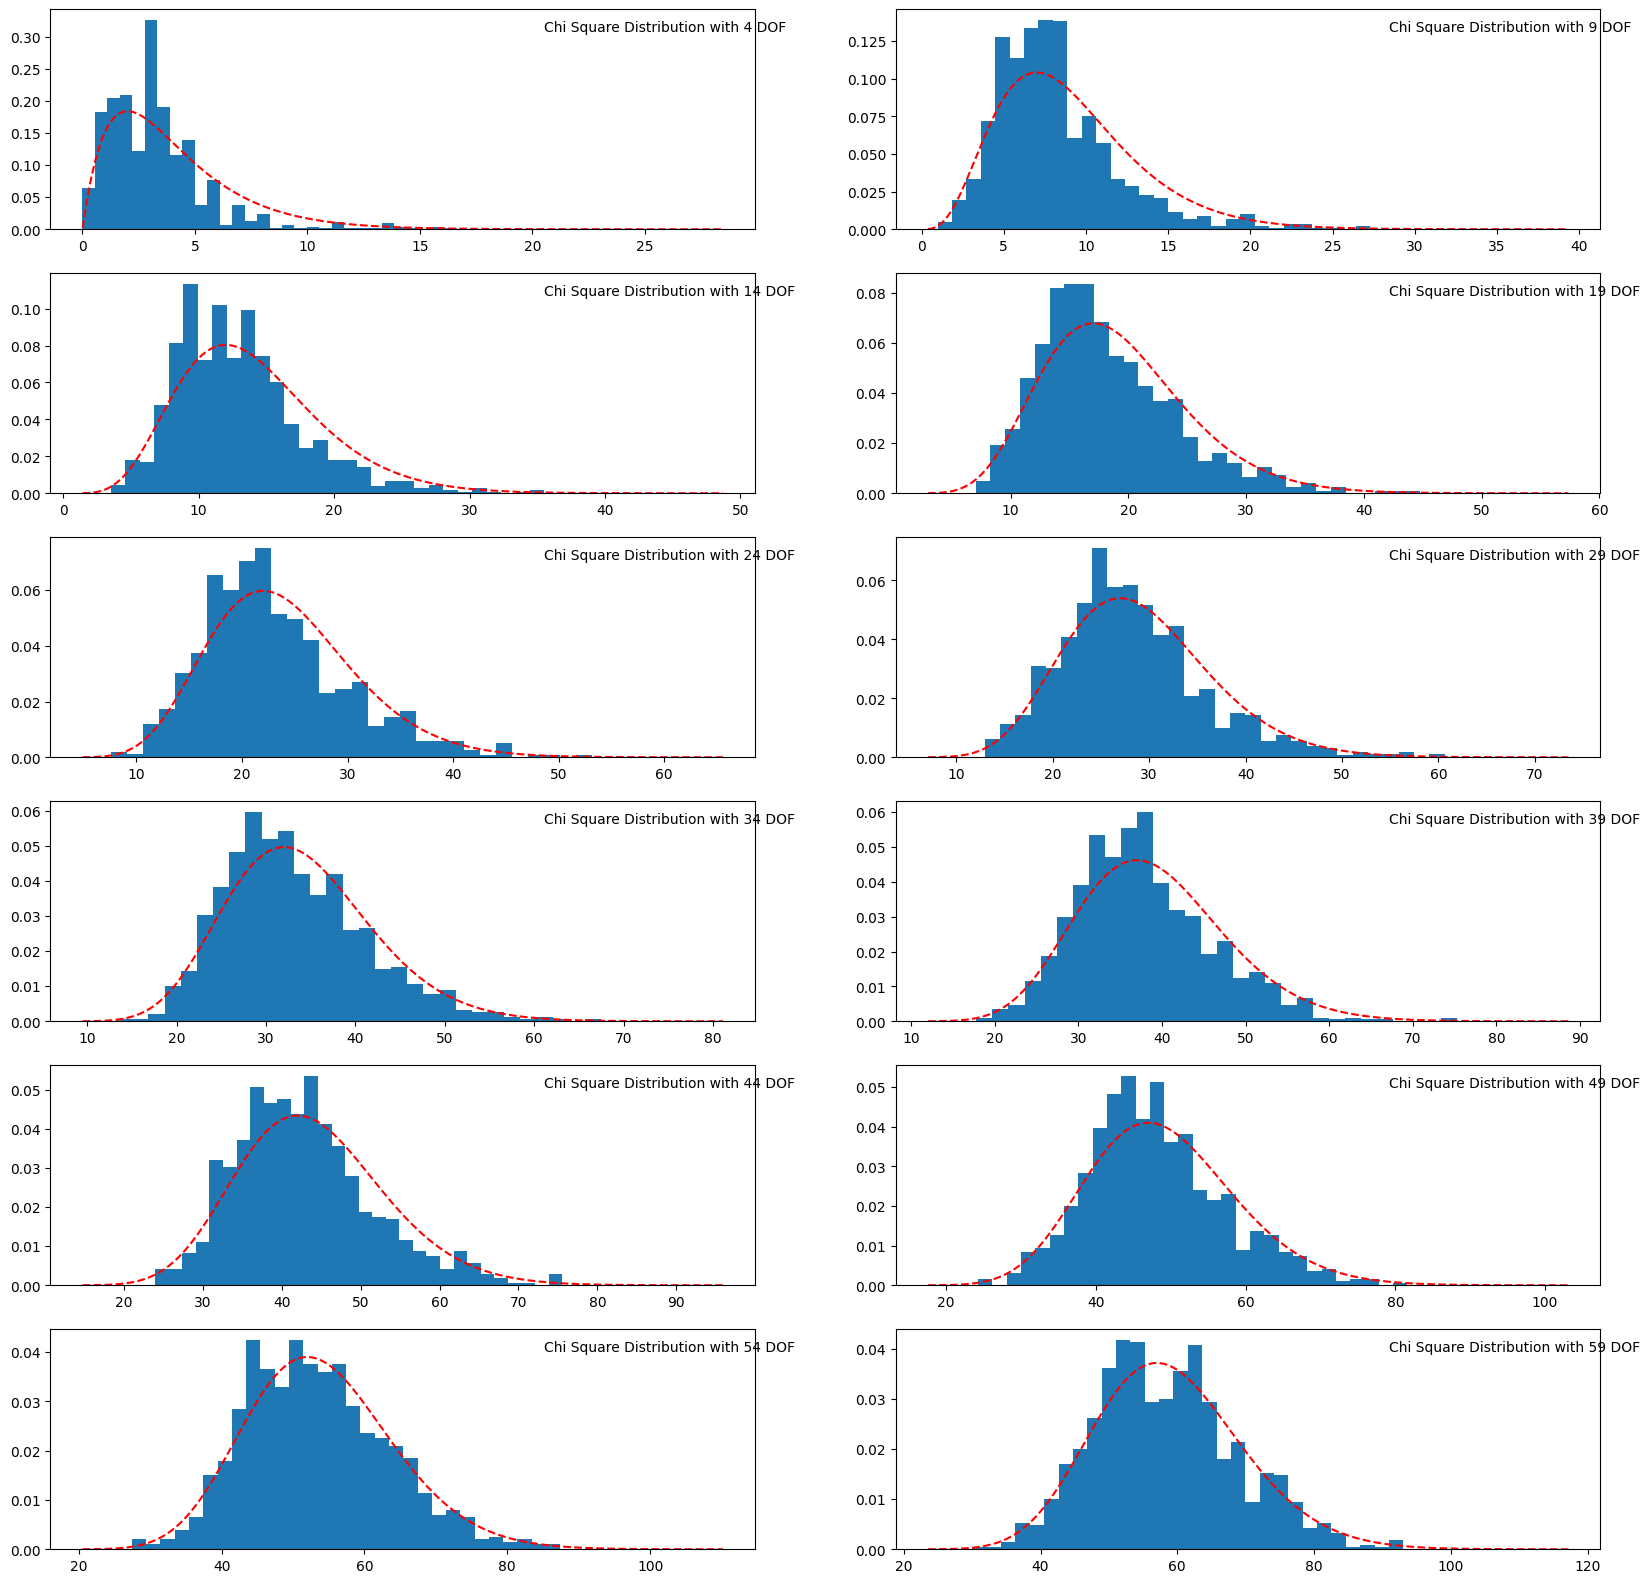

In [44]:
count = 1
plt.figure(figsize = (20,20))
for i in sample_sizes:
    plt.subplot(6 , 2 , count)
    sample_variances = [] 
    for j in range(1000):
        sample = data.sample(i)
        sample_variances.append(((i-1)*np.var(sample['age'] , ddof = 0))/(data['age'].var(ddof=0)))
    lb = chi2.ppf(0.00001 , df = i-1)
    ub = chi2.ppf(0.99999 , df = i-1)
    x = np.linspace(lb , ub , 1000)
    y = chi2.pdf(x , df = i-1)
    plt.hist(sample_variances , bins=30 , density=True)
    plt.plot(x , y , 'r--')
    plt.annotate(f'Chi Square Distribution with {i-1} DOF' , xy = (0.7,0.9) , xycoords='axes fraction')
    count += 1


                                            ***********  Sampling Distribution of Sample Means ********


    As we Know that Sample Means will follow Normal Distribution with Mean = Population Mean and Variance = Population Variance / sample_size

In [45]:
## Lets Verify it 

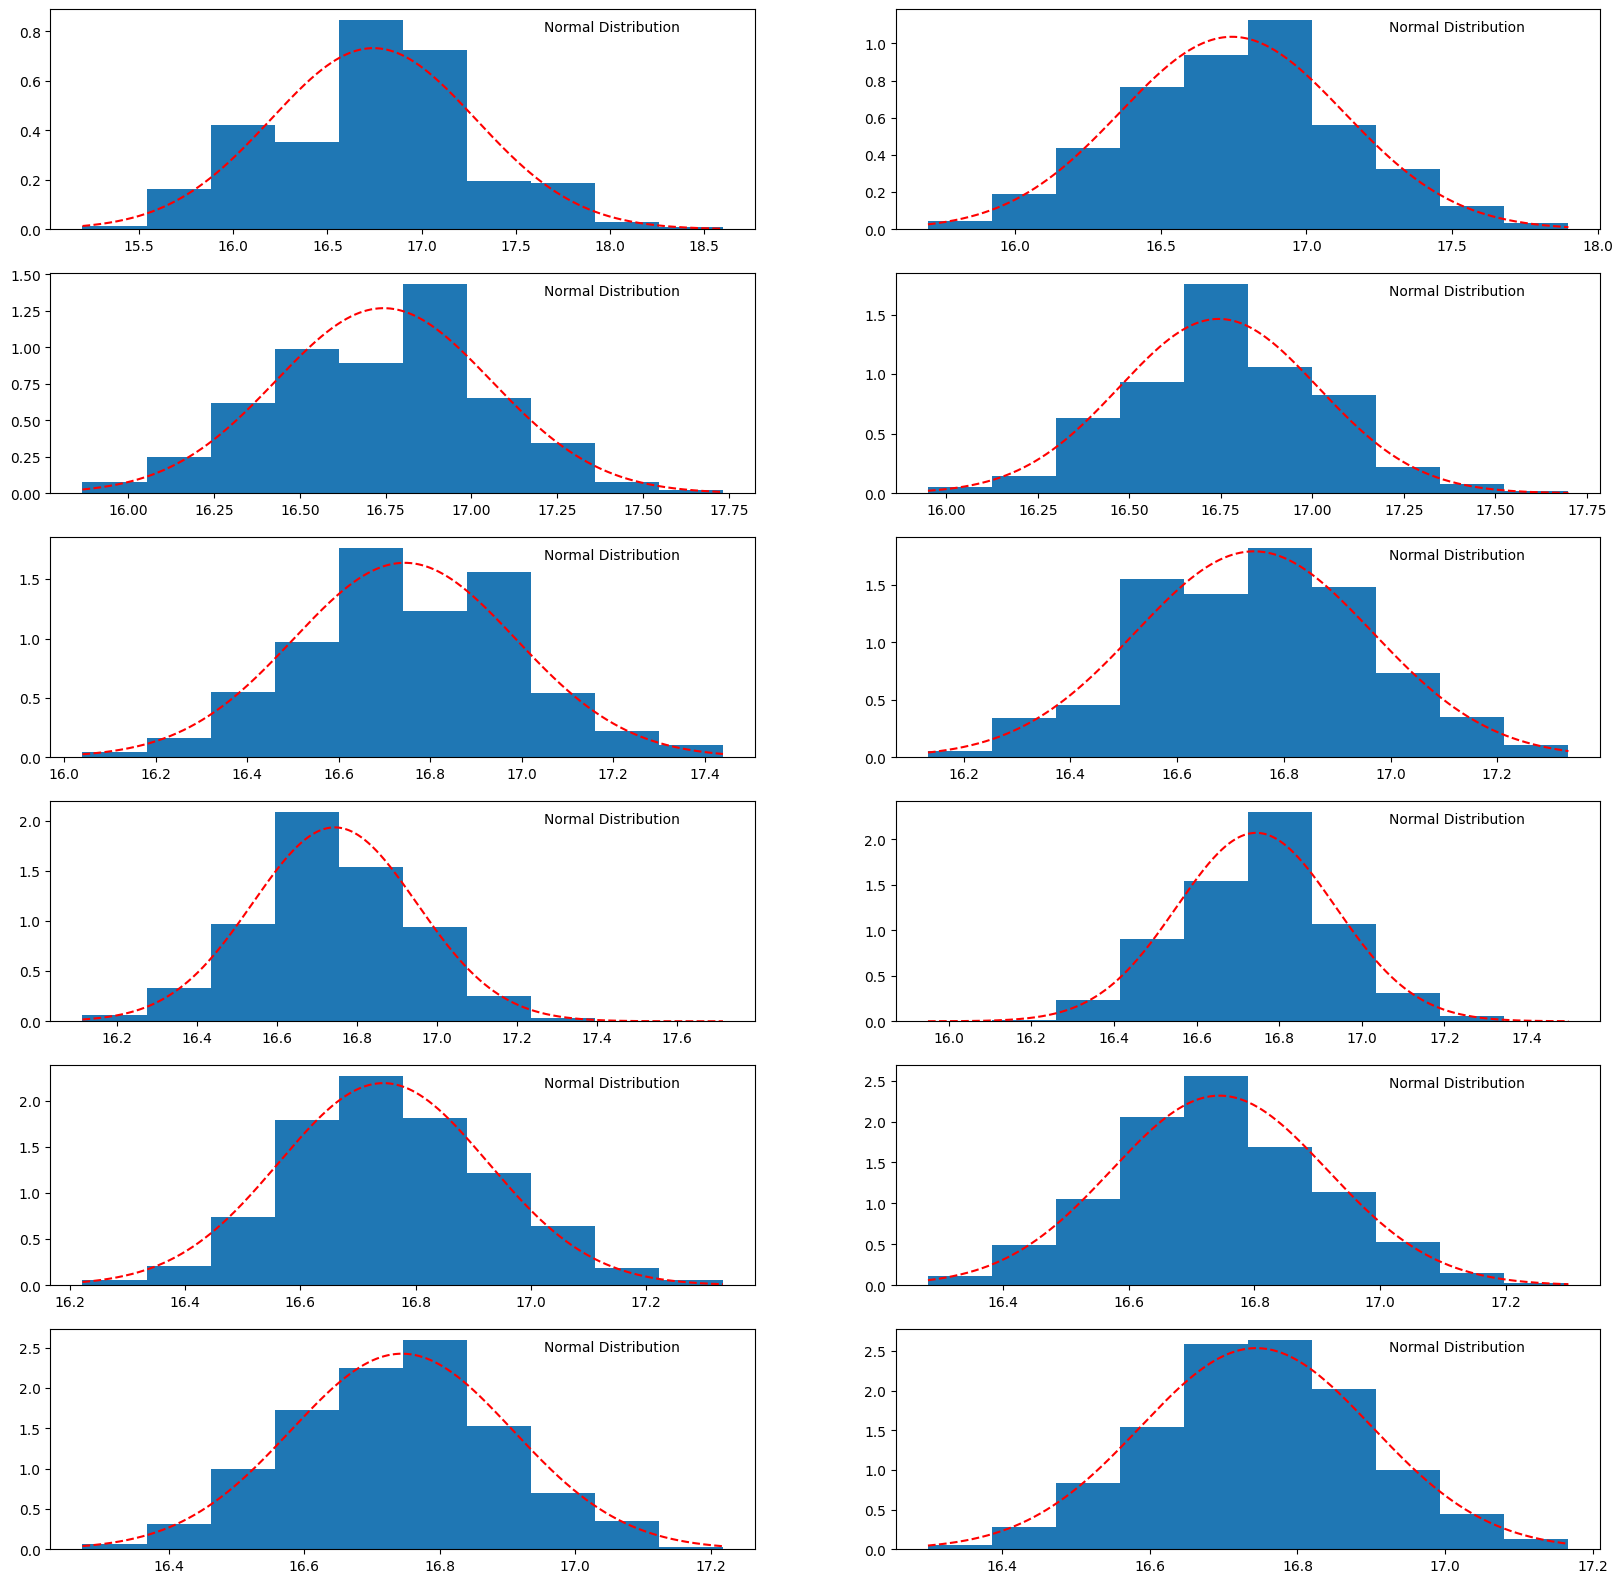

In [50]:
count = 1
plt.figure(figsize = (20,20))
for i in sample_sizes:
    plt.subplot(6 , 2 , count)
    sample_means = [] 
    for j in range(1000):
        sample = data['age'].sample(i)
        sample_means.append(sample.mean())
    lb = min(sample_means)
    ub = max(sample_means)
    x = np.linspace(lb , ub , 1000)
    y = norm.pdf(x , data['age'].mean() , data['age'].std()/i**(0.5))
    plt.hist(sample_means , bins=10 , density=True)
    plt.plot(x , y , 'r--')
    plt.annotate(f'Normal Distribution' , xy = (0.7,0.9) , xycoords='axes fraction')
    count += 1